In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
!ls '/content/drive/MyDrive/Dataset/'

 final_stopwords.txt   Sarcasm_Headlines_Dataset.json	   test.json
 hindi_para.txt        Sarcasm_Headlines_Dataset_v2.json   train.json
 MergeResult.xlsx     'Sentiment Analysis'		   useless


In [ ]:
train_data = pd.read_json ('/content/drive/MyDrive/Dataset/Sarcasm_Headlines_Dataset.json', lines=True)

In [ ]:
train_data

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
...,...,...,...
26704,https://www.huffingtonpost.com/entry/american-...,american politics in moral free-fall,0
26705,https://www.huffingtonpost.com/entry/americas-...,america's best 20 hikes,0
26706,https://www.huffingtonpost.com/entry/reparatio...,reparations and obama,0
26707,https://www.huffingtonpost.com/entry/israeli-b...,israeli ban targeting boycott supporters raise...,0


In [ ]:
train_data['headline']

0        former versace store clerk sues over secret 'b...
1        the 'roseanne' revival catches up to our thorn...
2        mom starting to fear son's web series closest ...
3        boehner just wants wife to listen, not come up...
4        j.k. rowling wishes snape happy birthday in th...
                               ...                        
26704                 american politics in moral free-fall
26705                              america's best 20 hikes
26706                                reparations and obama
26707    israeli ban targeting boycott supporters raise...
26708                    gourmet gifts for the foodie 2014
Name: headline, Length: 26709, dtype: object

In [ ]:
non_sarcastic = train_data[train_data['is_sarcastic']==0]

In [ ]:
len(non_sarcastic)

14985

In [ ]:
sarcastic = train_data[train_data['is_sarcastic']==1]

In [ ]:
len(sarcastic)

11724

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


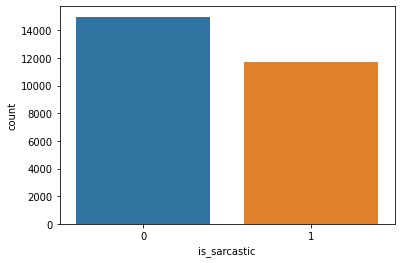

In [ ]:
import seaborn as sns
sns.countplot(train_data['is_sarcastic'], label = "Count");

In [ ]:
#labels = train_data['is_sarcastic']
#encoded_labels = np.array(labels)

In [ ]:
#sentences = train_data['headline'].tolist()

In [ ]:
#sentences

In [ ]:
#tokenizer = Tokenizer(num_words = 10000, oov_token="<OOV>")
#tokenizer.fit_on_texts(sentences)
#word_index = tokenizer.word_index
#sequences = tokenizer.texts_to_sequences(sentences)
#padded_train = pad_sequences(sequences, padding='post', maxlen=100)
#print(word_index)

In [ ]:
sequences

[[308, 1, 679, 3337, 2298, 48, 382, 2576, 1, 6, 2577, 8434],
 [4, 8435, 3338, 2746, 22, 2, 166, 8436, 416, 3112, 6, 258, 9, 1002],
 [145, 838, 2, 907, 1749, 2093, 582, 4719, 221, 143, 39, 46, 2, 1],
 [1485, 36, 224, 400, 2, 1832, 29, 319, 22, 10, 2924, 1393, 6969, 968],
 [767, 719, 4720, 908, 1, 623, 594, 5, 4, 95, 1309, 92],
 [1, 4, 365, 73],
 [4, 6970, 351, 6, 461, 4274, 2195, 1486],
 [19, 479, 39, 1168, 31, 155, 2, 99, 83, 18, 158, 6, 32, 352],
 [249, 3623, 6971, 555, 5274, 1995, 141],
 [2094, 326, 347, 401, 60, 1, 6, 4, 3896],
 [2925, 1680, 4721, 14, 37, 4275, 6972, 5, 2095, 1103],
 [286, 782, 462, 8, 1556, 1911, 9, 3624],
 [234, 514, 2926, 13, 9, 929, 226, 369, 2, 4276, 1, 8437],
 [238, 3897, 8438, 3339, 38, 235, 1, 6, 7, 173],
 [1, 1394, 665, 651, 5, 327, 3, 1031],
 [534, 2095, 1, 123, 1, 6, 1, 4722, 1912],
 [2578,
  1395,
  383,
  45,
  3898,
  348,
  319,
  1032,
  2,
  24,
  1,
  20,
  1104,
  387,
  103,
  1310],
 [1681, 8439, 3113, 8440, 20, 6973, 1218],
 [1, 857, 2, 1913, 2

In [ ]:
#padded_train

In [ ]:
vocab_size = 10000 # corpus size
embedding_size = 8 # no. of features
max_length = 16
trunc_type='post'
padding_type = 'post'
oov_tok = "<OOV>" # out of vocab
training_size = 20000

In [ ]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_size, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(1e-5),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 16, 8)             80000     
_________________________________________________________________
bidirectional (Bidirectional (None, 16, 128)           37376     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 162,817
Trainable params: 162,817
Non-trainable params: 0
__________________________________________________

In [ ]:
num_epochs = 10
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=1)

#verbose=0 will show you nothing (silent)

# verbose=1 will show you an animated progress bar like this:

#progres_bar : [=========>......]

#verbose=2 will just mention the number of epoch like this:

# 1/10..

Epoch 1/10
625/625 [==============================] - 23s 29ms/step - loss: 0.6913 - accuracy: 0.5546 - val_loss: 0.6890 - val_accuracy: 0.5633
Epoch 2/10
625/625 [==============================] - 16s 26ms/step - loss: 0.6871 - accuracy: 0.5603 - val_loss: 0.6843 - val_accuracy: 0.5633
Epoch 3/10
625/625 [==============================] - 16s 26ms/step - loss: 0.6825 - accuracy: 0.5603 - val_loss: 0.6798 - val_accuracy: 0.5633
Epoch 4/10
625/625 [==============================] - 16s 26ms/step - loss: 0.6756 - accuracy: 0.5604 - val_loss: 0.6673 - val_accuracy: 0.5637
Epoch 5/10
625/625 [==============================] - 16s 26ms/step - loss: 0.6252 - accuracy: 0.6209 - val_loss: 0.5689 - val_accuracy: 0.7180
Epoch 6/10
625/625 [==============================] - 16s 26ms/step - loss: 0.5275 - accuracy: 0.7556 - val_loss: 0.5167 - val_accuracy: 0.7518
Epoch 7/10
625/625 [==============================] - 16s 26ms/step - loss: 0.4824 - accuracy: 0.7744 - val_loss: 0.4910 - val_accuracy:

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

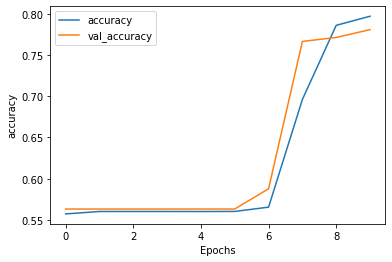

In [ ]:
plot_graphs(history, 'accuracy')

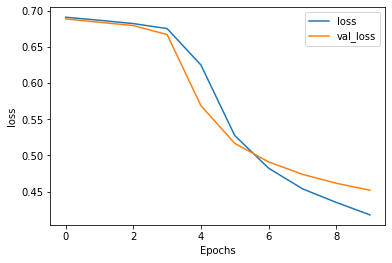

In [ ]:
plot_graphs(history, 'loss')

In [ ]:
!mkdir -p saved_model_bi_lstm
model.save('/content/drive/MyDrive/Sarcasm Detection - 8th Sem/English Models/saved_model_bi_lstm/my_model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Sarcasm Detection - 8th Sem/English Models/saved_model_bi_lstm/my_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Sarcasm Detection - 8th Sem/English Models/saved_model_bi_lstm/my_model/assets


In [ ]:
!ls '/content/drive/MyDrive/Sarcasm Detection - 8th Sem/English Models/saved_model_bi_lstm/my_model'

assets	keras_metadata.pb  saved_model.pb  variables


In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/Sarcasm Detection - 8th Sem/English Models/saved_model_bi_lstm/my_model')

In [ ]:
loss, acc = new_model.evaluate(testing_padded, testing_labels, verbose=1)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

210/210 [==============================] - 3s 7ms/step - loss: 0.4518 - accuracy: 0.7848
Restored model, accuracy: 78.48%


In [ ]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_size, input_length=max_length),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(1e-5),
              metrics=['accuracy'])
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 16, 8)             80000     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                18688     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 102,913
Trainable params: 102,913
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 10
history_2 = model_2.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=1)

#verbose=0 will show you nothing (silent)

# verbose=1 will show you an animated progress bar like this:

#progres_bar : [=========>......]

#verbose=2 will just mention the number of epoch like this:

# 1/10..

Epoch 1/10
625/625 [==============================] - 8s 11ms/step - loss: 0.6917 - accuracy: 0.5533 - val_loss: 0.6904 - val_accuracy: 0.5633
Epoch 2/10
625/625 [==============================] - 6s 10ms/step - loss: 0.6894 - accuracy: 0.5604 - val_loss: 0.6880 - val_accuracy: 0.5633
Epoch 3/10
625/625 [==============================] - 6s 10ms/step - loss: 0.6870 - accuracy: 0.5603 - val_loss: 0.6856 - val_accuracy: 0.5633
Epoch 4/10
625/625 [==============================] - 6s 10ms/step - loss: 0.6851 - accuracy: 0.5603 - val_loss: 0.6834 - val_accuracy: 0.5633
Epoch 5/10
625/625 [==============================] - 6s 10ms/step - loss: 0.6831 - accuracy: 0.5603 - val_loss: 0.6809 - val_accuracy: 0.5633
Epoch 6/10
625/625 [==============================] - 6s 10ms/step - loss: 0.6792 - accuracy: 0.5603 - val_loss: 0.6742 - val_accuracy: 0.5633
Epoch 7/10
625/625 [==============================] - 6s 10ms/step - loss: 0.6596 - accuracy: 0.5634 - val_loss: 0.6285 - val_accuracy: 0.5976

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history_2.history[string])
  plt.plot(history_2.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

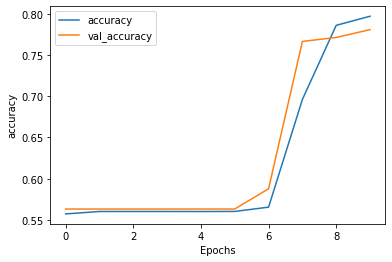

In [ ]:
plot_graphs(history_2, 'accuracy')

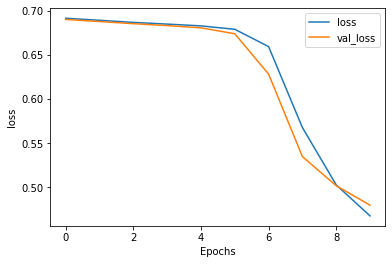

In [ ]:
plot_graphs(history_2, 'loss')

In [ ]:
!mkdir -p saved_model_lstm
model_2.save('/content/drive/MyDrive/Sarcasm Detection - 8th Sem/English Models/saved_model_lstm/my_model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Sarcasm Detection - 8th Sem/English Models/saved_model_lstm/my_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Sarcasm Detection - 8th Sem/English Models/saved_model_lstm/my_model/assets


In [ ]:
!ls '/content/drive/MyDrive/Sarcasm Detection - 8th Sem/English Models/saved_model_lstm/my_model'

assets	keras_metadata.pb  saved_model.pb  variables


In [ ]:
new_model_2 = tf.keras.models.load_model('/content/drive/MyDrive/Sarcasm Detection - 8th Sem/English Models/saved_model_lstm/my_model')

In [ ]:
loss, acc = new_model_2.evaluate(testing_padded, testing_labels, verbose=1)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

210/210 [==============================] - 1s 3ms/step - loss: 0.4799 - accuracy: 0.7751
Restored model, accuracy: 77.51%


In [ ]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_size, input_length=max_length),
    tf.keras.layers.SimpleRNN(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(1e-5),
              metrics=['accuracy'])
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 16, 8)             80000     
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 64)                4672      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 88,897
Trainable params: 88,897
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 10
history_3 = model_3.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=1)

#verbose=0 will show you nothing (silent)

# verbose=1 will show you an animated progress bar like this:

#progres_bar : [=========>......]

#verbose=2 will just mention the number of epoch like this:

# 1/10..

Epoch 1/10
625/625 [==============================] - 5s 6ms/step - loss: 0.6915 - accuracy: 0.5302 - val_loss: 0.6880 - val_accuracy: 0.5655
Epoch 2/10
625/625 [==============================] - 4s 6ms/step - loss: 0.6866 - accuracy: 0.5606 - val_loss: 0.6839 - val_accuracy: 0.5649
Epoch 3/10
625/625 [==============================] - 4s 6ms/step - loss: 0.6840 - accuracy: 0.5631 - val_loss: 0.6815 - val_accuracy: 0.5648
Epoch 4/10
625/625 [==============================] - 4s 6ms/step - loss: 0.6809 - accuracy: 0.5677 - val_loss: 0.6771 - val_accuracy: 0.5685
Epoch 5/10
625/625 [==============================] - 4s 6ms/step - loss: 0.6734 - accuracy: 0.5824 - val_loss: 0.6635 - val_accuracy: 0.5999
Epoch 6/10
625/625 [==============================] - 4s 6ms/step - loss: 0.6423 - accuracy: 0.6392 - val_loss: 0.6081 - val_accuracy: 0.6709
Epoch 7/10
625/625 [==============================] - 4s 6ms/step - loss: 0.5891 - accuracy: 0.6866 - val_loss: 0.5655 - val_accuracy: 0.6998
Epoch 

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history_3.history[string])
  plt.plot(history_3.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

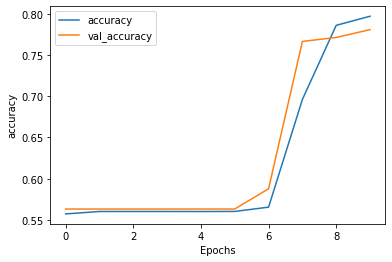

In [ ]:
plot_graphs(history_3, 'accuracy')

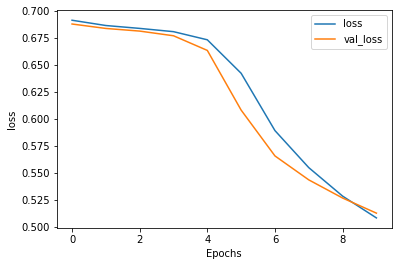

In [ ]:
plot_graphs(history_3, 'loss')

In [ ]:
!mkdir -p saved_model_rnn
model_3.save('/content/drive/MyDrive/Sarcasm Detection - 8th Sem/English Models/saved_model_rnn/my_model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Sarcasm Detection - 8th Sem/English Models/saved_model_rnn/my_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Sarcasm Detection - 8th Sem/English Models/saved_model_rnn/my_model/assets


In [ ]:
!ls '/content/drive/MyDrive/Sarcasm Detection - 8th Sem/English Models/saved_model_rnn/my_model'

assets	keras_metadata.pb  saved_model.pb  variables


In [ ]:
new_model_3 = tf.keras.models.load_model('/content/drive/MyDrive/Sarcasm Detection - 8th Sem/English Models/saved_model_rnn/my_model')

In [ ]:
loss, acc = new_model_3.evaluate(testing_padded, testing_labels, verbose=1)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

210/210 [==============================] - 1s 2ms/step - loss: 0.5124 - accuracy: 0.7417
Restored model, accuracy: 74.17%


In [ ]:
model_4 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_size, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(1e-5),
              metrics=['accuracy'])
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 16, 8)             80000     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 128)               37376     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 125,697
Trainable params: 125,697
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 10
history_4 = model_4.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=1)

#verbose=0 will show you nothing (silent)

# verbose=1 will show you an animated progress bar like this:

#progres_bar : [=========>......]

#verbose=2 will just mention the number of epoch like this:

# 1/10..

Epoch 1/10
625/625 [==============================] - 12s 16ms/step - loss: 0.6911 - accuracy: 0.5573 - val_loss: 0.6893 - val_accuracy: 0.5633
Epoch 2/10
625/625 [==============================] - 9s 15ms/step - loss: 0.6880 - accuracy: 0.5603 - val_loss: 0.6862 - val_accuracy: 0.5633
Epoch 3/10
625/625 [==============================] - 9s 15ms/step - loss: 0.6856 - accuracy: 0.5603 - val_loss: 0.6836 - val_accuracy: 0.5633
Epoch 4/10
625/625 [==============================] - 9s 15ms/step - loss: 0.6835 - accuracy: 0.5603 - val_loss: 0.6812 - val_accuracy: 0.5633
Epoch 5/10
625/625 [==============================] - 9s 14ms/step - loss: 0.6808 - accuracy: 0.5602 - val_loss: 0.6779 - val_accuracy: 0.5633
Epoch 6/10
625/625 [==============================] - 9s 14ms/step - loss: 0.6760 - accuracy: 0.5604 - val_loss: 0.6713 - val_accuracy: 0.5633
Epoch 7/10
625/625 [==============================] - 9s 14ms/step - loss: 0.6624 - accuracy: 0.5656 - val_loss: 0.6438 - val_accuracy: 0.587

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history_4.history[string])
  plt.plot(history_4.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

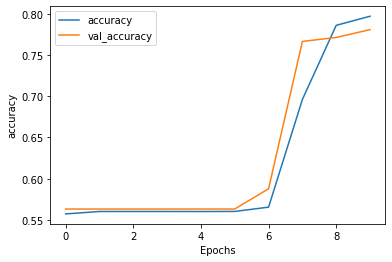

In [ ]:
plot_graphs(history_4, 'accuracy')

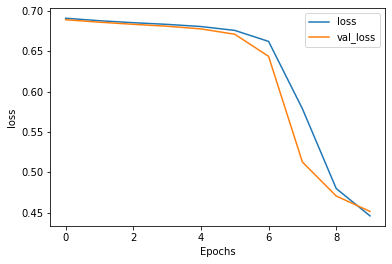

In [ ]:
plot_graphs(history_4, 'loss')

In [ ]:
!mkdir -p saved_model_bi_lstm_1
model_4.save('/content/drive/MyDrive/Sarcasm Detection - 8th Sem/English Models/saved_model_bi_lstm_1/my_model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Sarcasm Detection - 8th Sem/English Models/saved_model_bi_lstm_1/my_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Sarcasm Detection - 8th Sem/English Models/saved_model_bi_lstm_1/my_model/assets


In [ ]:
!ls '/content/drive/MyDrive/Sarcasm Detection - 8th Sem/English Models/saved_model_bi_lstm_1/my_model'

assets	keras_metadata.pb  saved_model.pb  variables


In [ ]:
new_model_4 = tf.keras.models.load_model('/content/drive/MyDrive/Sarcasm Detection - 8th Sem/English Models/saved_model_bi_lstm_1/my_model')

In [ ]:
loss, acc = new_model_4.evaluate(testing_padded, testing_labels,verbose=1)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

210/210 [==============================] - 2s 4ms/step - loss: 0.4514 - accuracy: 0.7807
Restored model, accuracy: 78.07%
